## Cancer Data

570 cancer cells and 30 features to determine whether the cancer cells in our data are benign or malignant.

Our cancer data contains 2 types of cancers:
1. benign cancer (B)
2. malignant cancer (M).

Features:

|Feature|Description|
|---|---|
|``id``|Identifier field|
|``diagnosis``|Cancer diagnosis type (our ``target``)|
|``radius_mean``|Visual characteristic of cancer (mean)|
|``texture_mean``|Visual characteristic of cancer (mean)|
|``perimeter_mean``|Visual characteristic of cancer (mean)|
|``area_mean``|Visual characteristic of cancer (mean)|
|``smoothness_mean``|Visual characteristic of cancer (mean)|
|``compactness_mean``|Visual characteristic of cancer (mean)|
|``concavity_mean``|Visual characteristic of cancer (mean)|
|``concave points_mean``|Visual characteristic of cancer (mean)|
|``symmetry_mean``|Visual characteristic of cancer (mean)|
|``fractal_dimension_mean``|Visual characteristic of cancer (mean)|
|``radius_se``|Visual characteristic of cancer (standard error)|
|``texture_se``|Visual characteristic of cancer (standard error)|
|``perimeter_se``|Visual characteristic of cancer (standard error)|
|``area_se``|Visual characteristic of cancer (standard error)|
|``smoothness_se``|Visual characteristic of cancer (standard error)|
|``compactness_se``|Visual characteristic of cancer (standard error)|
|``concavity_se``|Visual characteristic of cancer (standard error)|
|``concave points_se``|Visual characteristic of cancer (standard error)|
|``symmetry_se``|Visual characteristic of cancer (standard error)|
|``fractal_dimension_se``|Visual characteristic of cancer (standard error)|
|``radius_worst``|Visual characteristic of cancer (worst)|
|``texture_worst``|Visual characteristic of cancer (worst)|
|``perimeter_worst``|Visual characteristic of cancer (worst)|
|``area_worst``|Visual characteristic of cancer (worst)|
|``smoothness_worst``|Visual characteristic of cancer (worst)|
|``compactness_worst``|Visual characteristic of cancer (worst)|
|``concavity_worst``|Visual characteristic of cancer (worst)|
|``concave points_worst``|Visual characteristic of cancer (worst)|
|``symmetry_worst``|Visual characteristic of cancer (worst)|
|``fractal_dimension_worst``|Visual characteristic of cancer (worst)|



#### Index

1. Dataset import
2. Data processing and analysis
3. Models
4. Conclusion

Libraries:

In [237]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

#### **1. Dataset import**

In [238]:
file = pd.read_csv('./dataset/Cancer_Data.csv')

Checking if import was successful

In [239]:
file.head(10)

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean   
0    842302         M        17.99         10.38          122.80     1001.0  \
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   
5    843786         M        12.45         15.70           82.57      477.1   
6    844359         M        18.25         19.98          119.60     1040.0   
7  84458202         M        13.71         20.83           90.20      577.9   
8    844981         M        13.00         21.82           87.50      519.8   
9  84501001         M        12.46         24.04           83.97      475.9   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean   
0          0.11840           0.27760         0.30010              0.14710  \
1          0.08474           0.07864         0.08690              0.07017   
2          0.10960           0.15990         0.19740              0.12790   
3          0.14250           0.28390         0.24140              0.10520   
4          0.10030           0.13280         0.19800              0.10430   
5          0.12780           0.17000         0.15780              0.08089   
6          0.09463           0.10900         0.11270              0.07400   
7          0.11890           0.16450         0.09366              0.05985   
8          0.12730           0.19320         0.18590              0.09353   
9          0.11860           0.23960         0.22730              0.08543   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst   
0  ...          17.33           184.60      2019.0            0.1622  \
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   
5  ...          23.75           103.40       741.6            0.1791   
6  ...          27.66           153.20      1606.0            0.1442   
7  ...          28.14           110.60       897.0            0.1654   
8  ...          30.73           106.20       739.3            0.1703   
9  ...          40.68            97.65       711.4            0.1853   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst   
0             0.6656           0.7119                0.2654          0.4601  \
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   
5             0.5249           0.5355                0.1741          0.3985   
6             0.2576           0.3784                0.1932          0.3063   
7             0.3682           0.2678                0.1556          0.3196   
8             0.5401           0.5390                0.2060          0.4378   
9             1.0580           1.1050                0.2210          0.4366   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  
5                  0.12440          NaN  
6                  0.08368          NaN  
7                  0.11510          NaN  
8                  0.10720          NaN  
9                  0.20750          NaN  

[10 rows x 33 columns]

Columns

In [240]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [241]:
file.describe()

id  radius_mean  texture_mean  perimeter_mean    area_mean   
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000  \
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean   
count       569.000000        569.000000      569.000000           569.000000  \
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  texture_worst  perimeter_worst   area_worst   
count     569.000000  ...     569.000000       569.000000   569.000000  \
mean        0.181162  ...      25.677223       107.261213   880.583128   
std         0.027414  ...       6.146258        33.602542   569.356993   
min         0.106000  ...      12.020000        50.410000   185.200000   
25%         0.161900  ...      21.080000        84.110000   515.300000   
50%         0.179200  ...      25.410000        97.660000   686.500000   
75%         0.195700  ...      29.720000       125.400000  1084.000000   
max         0.304000  ...      49.540000       251.200000  4254.000000   

       smoothness_worst  compactness_worst  concavity_worst   
count        569.000000         569.000000       569.000000  \
mean           0.132369           0.254265         0.272188   
std            0.022832           0.157336         0.208624   
min            0.071170           0.027290         0.000000   
25%            0.116600           0.147200         0.114500   
50%            0.131300           0.211900         0.226700   
75%            0.146000           0.339100         0.382900   
max            0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst   
count            569.000000      569.000000               569.000000  \
mean               0.114606        0.290076                 0.083946   
std                0.065732        0.061867                 0.018061   
min                0.000000        0.156500                 0.055040   
25%                0.064930        0.250400                 0.071460   
50%                0.099930        0.282200                 0.080040   
75%                0.161400        0.317900                 0.092080   
max                0.291000        0.663800                 0.207500   

       Unnamed: 32  
count          0.0  
mean           NaN  
std            NaN  
min            NaN  
25%            NaN  
50%            NaN  
75%            NaN  
max            NaN  

[8 rows x 32 columns]

In [242]:
file.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

There are no missing values so there is no need to replace any of them. We should however remove the ``Unnamed: 32`` column seeing as it only contains any information, only null-values.

In [243]:
file = file.drop("Unnamed: 32", axis=1)
file

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean   
0      842302         M        17.99         10.38          122.80     1001.0  \
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean   
0            0.11840           0.27760         0.30010              0.14710  \
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  radius_worst  texture_worst  perimeter_worst  area_worst   
0    ...        25.380          17.33           184.60      2019.0  \
1    ...        24.990          23.41           158.80      1956.0   
2    ...        23.570          25.53           152.50      1709.0   
3    ...        14.910          26.50            98.87       567.7   
4    ...        22.540          16.67           152.20      1575.0   
..   ...           ...            ...              ...         ...   
564  ...        25.450          26.40           166.10      2027.0   
565  ...        23.690          38.25           155.00      1731.0   
566  ...        18.980          34.12           126.70      1124.0   
567  ...        25.740          39.42           184.60      1821.0   
568  ...         9.456          30.37            59.16       268.6   

     smoothness_worst  compactness_worst  concavity_worst   
0             0.16220            0.66560           0.7119  \
1             0.12380            0.18660           0.2416   
2             0.14440            0.42450           0.4504   
3             0.20980            0.86630           0.6869   
4             0.13740            0.20500           0.4000   
..                ...                ...              ...   
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    ...             ...                      ...  
564                0.2216       

Is important also to drop meaningless variables like id, since it don't add any useful information for the further classfication

In [244]:
file = file.drop("id", axis=1)
file

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean   
0           M        17.99         10.38          122.80     1001.0  \
1           M        20.57         17.77          132.90     1326.0   
2           M        19.69         21.25          130.00     1203.0   
3           M        11.42         20.38           77.58      386.1   
4           M        20.29         14.34          135.10     1297.0   
..        ...          ...           ...             ...        ...   
564         M        21.56         22.39          142.00     1479.0   
565         M        20.13         28.25          131.20     1261.0   
566         M        16.60         28.08          108.30      858.1   
567         M        20.60         29.33          140.10     1265.0   
568         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean   
0            0.11840           0.27760         0.30010              0.14710  \
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst   
0           0.2419  ...        25.380          17.33           184.60  \
1           0.1812  ...        24.990          23.41           158.80   
2           0.2069  ...        23.570          25.53           152.50   
3           0.2597  ...        14.910          26.50            98.87   
4           0.1809  ...        22.540          16.67           152.20   
..             ...  ...           ...            ...              ...   
564         0.1726  ...        25.450          26.40           166.10   
565         0.1752  ...        23.690          38.25           155.00   
566         0.1590  ...        18.980          34.12           126.70   
567         0.2397  ...        25.740          39.42           184.60   
568         0.1587  ...         9.456          30.37            59.16   

     area_worst  smoothness_worst  compactness_worst  concavity_worst   
0        2019.0           0.16220            0.66560           0.7119  \
1        1956.0           0.12380            0.18660           0.2416   
2        1709.0           0.14440            0.42450           0.4504   
3         567.7           0.20980            0.86630           0.6869   
4        1575.0           0.13740            0.20500           0.4000   
..          ...               ...                ...              ...   
564      2027.0           0.14100            0.21130           0.4107   
565      1731.0           0.11660            0.19220           0.3215   
566      1124.0           0.11390            0.30940           0.3403   
567      1821.0           0.16500            0.86810           0.9387   
568       268.6           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    ...         

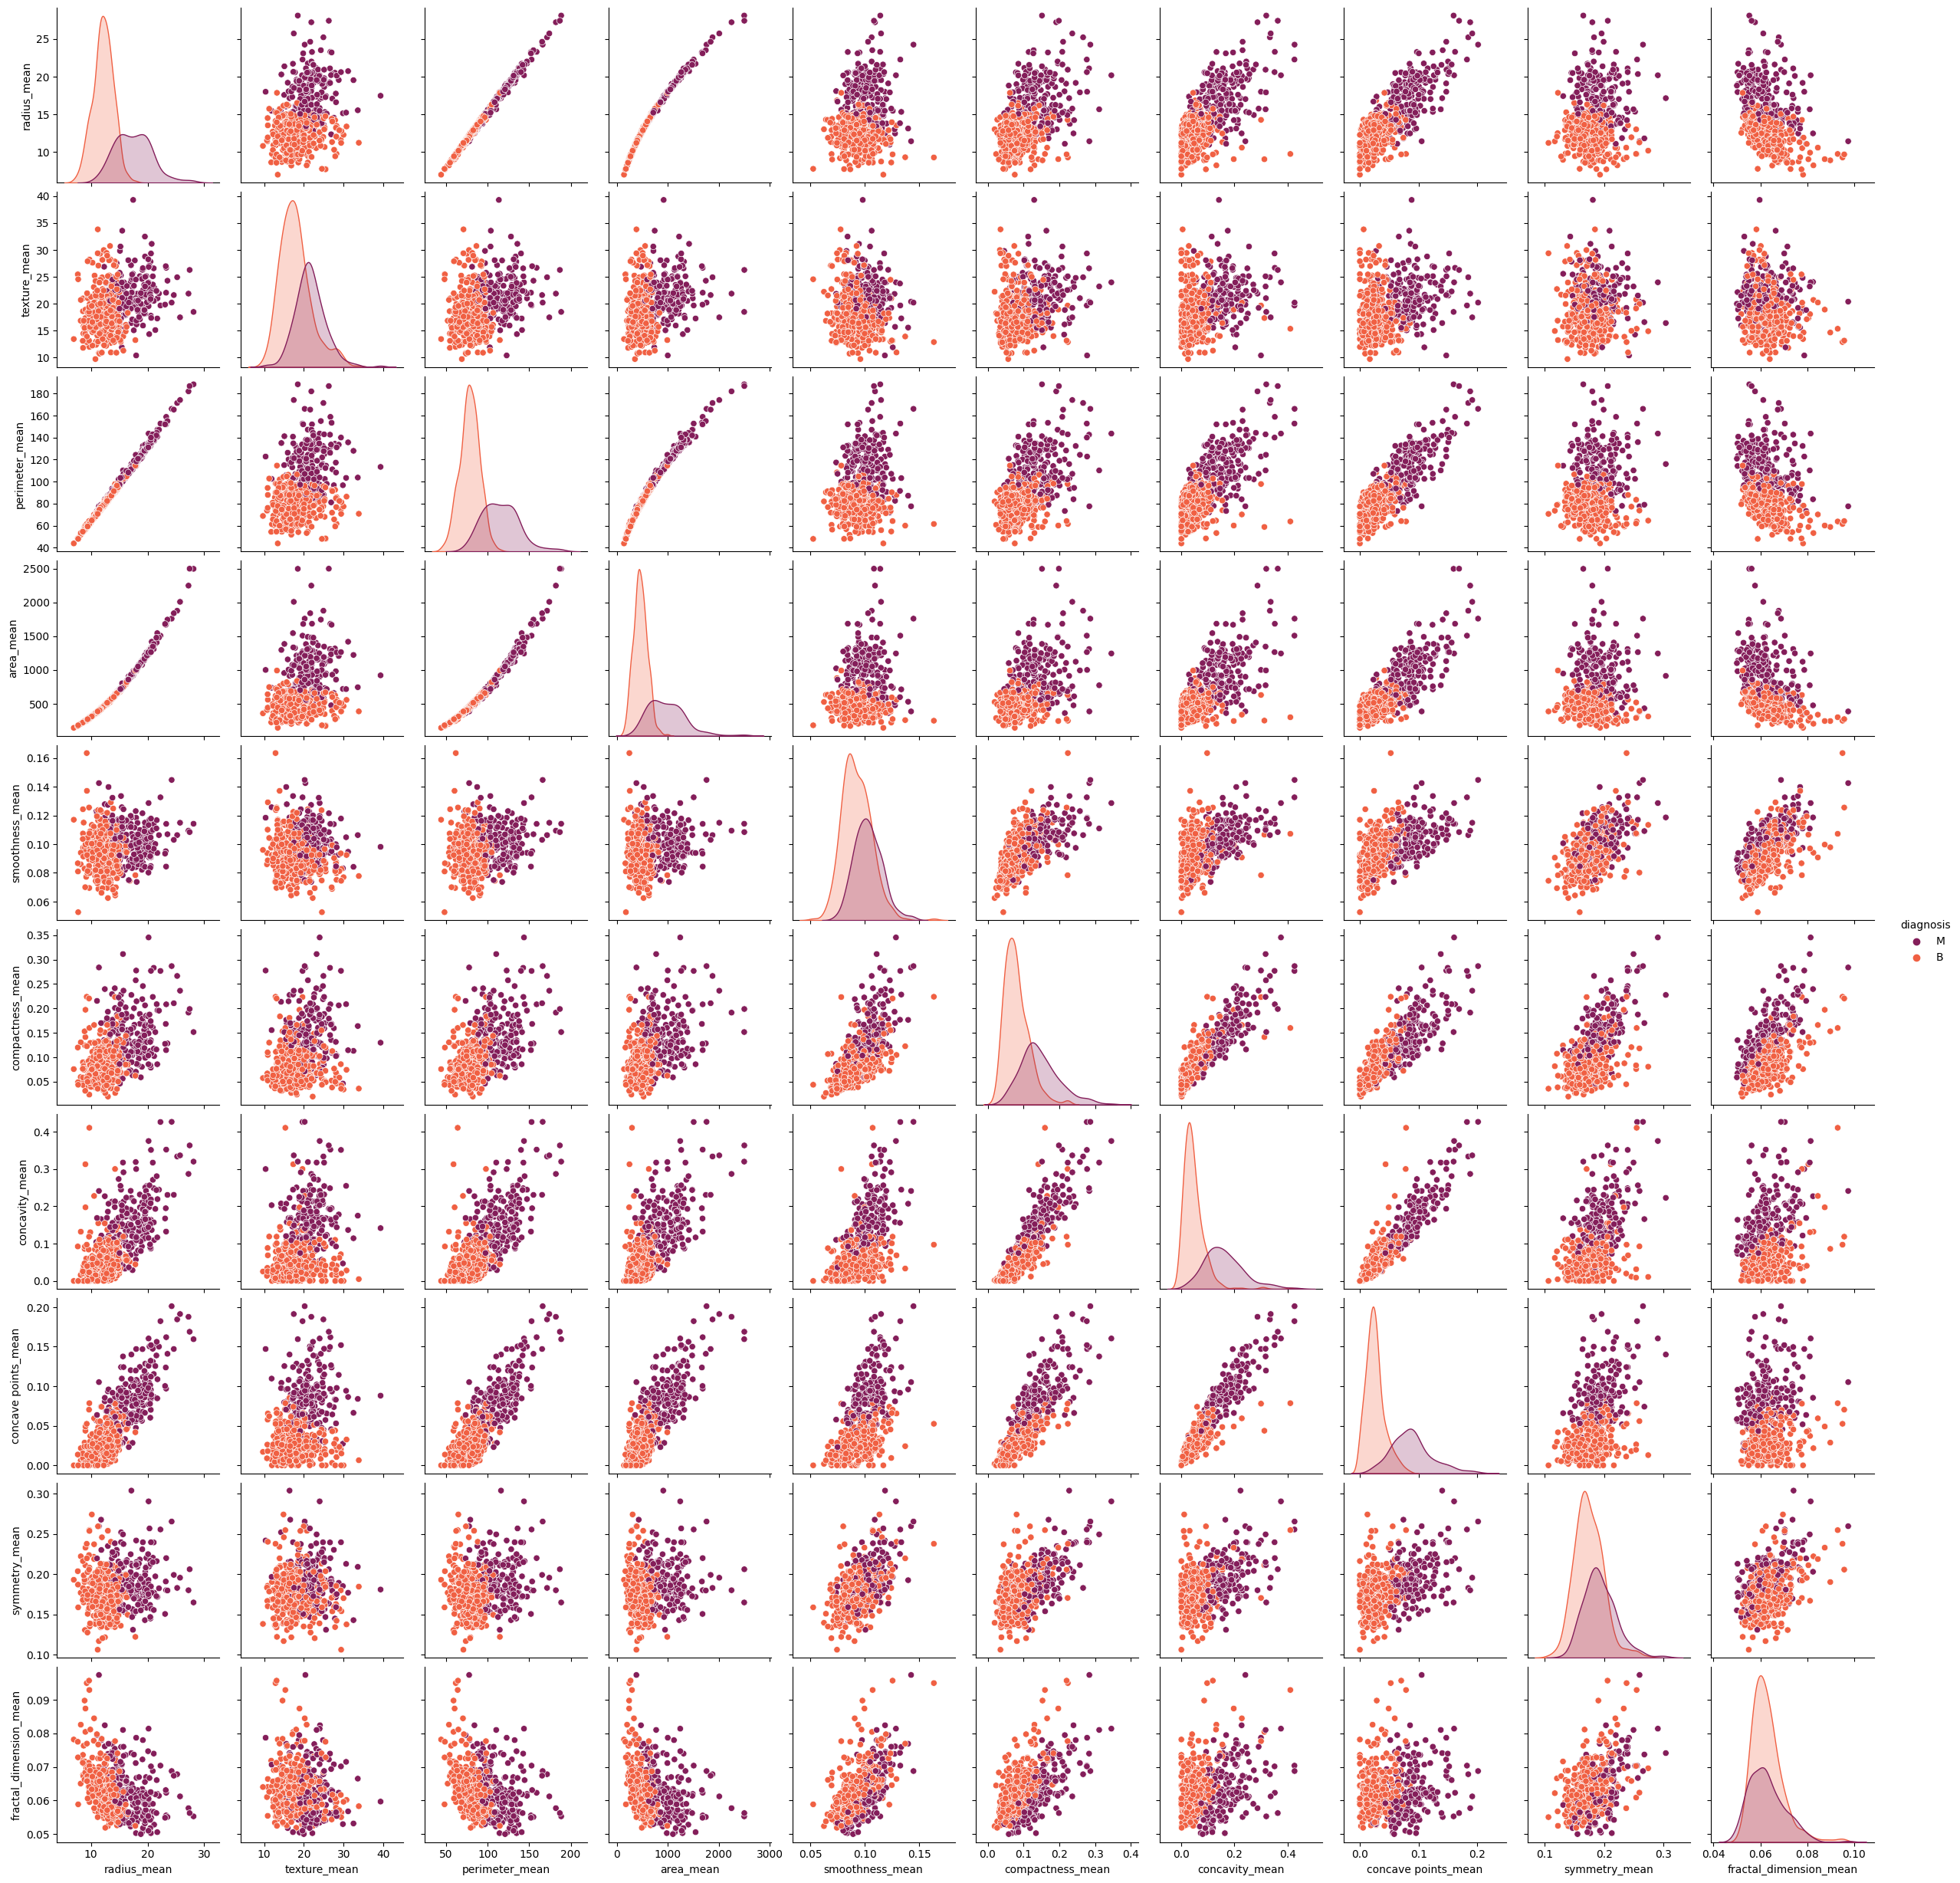

In [245]:
sns.pairplot(file, hue="diagnosis", palette="rocket", vars=['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'])


Seeing as there are no other major operations to be done currently we may now process our values and analyze them.

#### **2. Data processing and analysis**

See the number of each class in target variable:

<Axes: title={'center': 'Diagnosis distribution'}, xlabel='diagnosis', ylabel='count'>

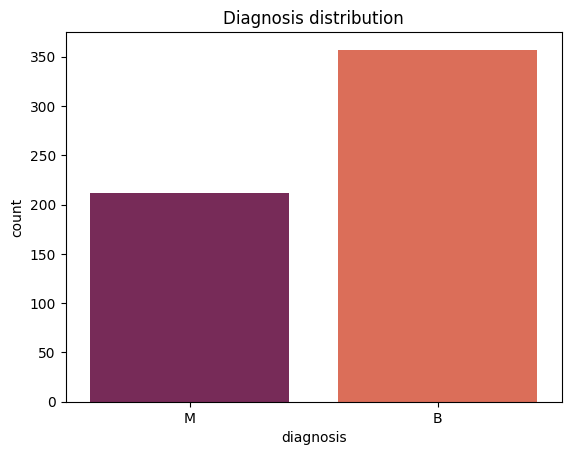

In [246]:
from sklearn.preprocessing import normalize
plt.gca().set_title("Diagnosis distribution")
sns.countplot(x = "diagnosis", palette = "rocket", data = file)

Now, we will turn the string labels in number label to the models recognize the code better.

In [247]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
file['diagnosis'] = label.fit_transform(file['diagnosis'])
file

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean   
0            1        17.99         10.38          122.80     1001.0  \
1            1        20.57         17.77          132.90     1326.0   
2            1        19.69         21.25          130.00     1203.0   
3            1        11.42         20.38           77.58      386.1   
4            1        20.29         14.34          135.10     1297.0   
..         ...          ...           ...             ...        ...   
564          1        21.56         22.39          142.00     1479.0   
565          1        20.13         28.25          131.20     1261.0   
566          1        16.60         28.08          108.30      858.1   
567          1        20.60         29.33          140.10     1265.0   
568          0         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean   
0            0.11840           0.27760         0.30010              0.14710  \
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst   
0           0.2419  ...        25.380          17.33           184.60  \
1           0.1812  ...        24.990          23.41           158.80   
2           0.2069  ...        23.570          25.53           152.50   
3           0.2597  ...        14.910          26.50            98.87   
4           0.1809  ...        22.540          16.67           152.20   
..             ...  ...           ...            ...              ...   
564         0.1726  ...        25.450          26.40           166.10   
565         0.1752  ...        23.690          38.25           155.00   
566         0.1590  ...        18.980          34.12           126.70   
567         0.2397  ...        25.740          39.42           184.60   
568         0.1587  ...         9.456          30.37            59.16   

     area_worst  smoothness_worst  compactness_worst  concavity_worst   
0        2019.0           0.16220            0.66560           0.7119  \
1        1956.0           0.12380            0.18660           0.2416   
2        1709.0           0.14440            0.42450           0.4504   
3         567.7           0.20980            0.86630           0.6869   
4        1575.0           0.13740            0.20500           0.4000   
..          ...               ...                ...              ...   
564      2027.0           0.14100            0.21130           0.4107   
565      1731.0           0.11660            0.19220           0.3215   
566      1124.0           0.11390            0.30940           0.3403   
567      1821.0           0.16500            0.86810           0.9387   
568       268.6           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    .

Person Correlation to see most independent variables:

In [248]:
from sklearn import feature_selection
X_file, Y_file = file.drop("diagnosis", axis=1), file["diagnosis"]
variables_indep = feature_selection.r_regression(X_file, Y_file, center=True, force_finite=True)

indep_df = pd.DataFrame(data=variables_indep, index= X_file.columns, columns=["Linear Correlation"])
indep_df = indep_df.sort_values("Linear Correlation", key=abs, ascending=False)
print(indep_df)

                         Linear Correlation
concave points_worst               0.793566
perimeter_worst                    0.782914
concave points_mean                0.776614
radius_worst                       0.776454
perimeter_mean                     0.742636
area_worst                         0.733825
radius_mean                        0.730029
area_mean                          0.708984
concavity_mean                     0.696360
concavity_worst                    0.659610
compactness_mean                   0.596534
compactness_worst                  0.590998
radius_se                          0.567134
perimeter_se                       0.556141
area_se                            0.548236
texture_worst                      0.456903
smoothness_worst                   0.421465
symmetry_worst                     0.416294
texture_mean                       0.415185
concave points_se                  0.408042
smoothness_mean                    0.358560
symmetry_mean                   

The decision between that two labels is related with the most correlated variables of different aspects.

For example, radius and perimeter means are almost the same measure, being more useful to compare using different aspect from the cancer. We decide to use so concave points_worst and perimeter_worst as axis.

In [249]:
axis_1, axis_2 = "concave points_worst", "perimeter_worst" #to get plot axis

Creating a normalized DataFrame since some algorithms benefit from it.

In [250]:
normalized = normalize(file[file.columns[1::]], axis=1)
normalized_file = pd.DataFrame(normalized, columns=file.columns[1::])
normalized_file = normalized_file.join(file.get("diagnosis"))
normalized_file

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean   
0       0.007925      0.004573        0.054099   0.440986         0.000052  \
1       0.008666      0.007486        0.055988   0.558619         0.000036   
2       0.009367      0.010109        0.061842   0.572276         0.000052   
3       0.016325      0.029133        0.110899   0.551922         0.000204   
4       0.009883      0.006985        0.065808   0.631774         0.000049   
..           ...           ...             ...        ...              ...   
564     0.008541      0.008870        0.056256   0.585933         0.000044   
565     0.009344      0.013114        0.060903   0.585355         0.000045   
566     0.011644      0.019696        0.075966   0.601905         0.000059   
567     0.009230      0.013142        0.062774   0.566806         0.000053   
568     0.023110      0.073082        0.142710   0.539032         0.000157   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean   
0            0.000122        0.000132             0.000065       0.000107  \
1            0.000033        0.000037             0.000030       0.000076   
2            0.000076        0.000094             0.000061       0.000098   
3            0.000406        0.000345             0.000150       0.000371   
4            0.000065        0.000096             0.000051       0.000088   
..                ...             ...                  ...            ...   
564          0.000046        0.000097             0.000055       0.000068   
565          0.000048        0.000067             0.000045       0.000081   
566          0.000072        0.000065             0.000037       0.000112   
567          0.000124        0.000157             0.000068       0.000107   
568          0.000130        0.000000             0.000000       0.000473   

     fractal_dimension_mean  ...  texture_worst  perimeter_worst  area_worst   
0                  0.000035  ...       0.007635         0.081325    0.889462  \
1                  0.000024  ...       0.009862         0.066899    0.824026   
2                  0.000029  ...       0.012145         0.072545    0.812984   
3                  0.000139  ...       0.037881         0.141333    0.811515   
4                  0.000029  ...       0.008120         0.074137    0.767189   
..                      ...  ...            ...              ...         ...   
564                0.000022  ...       0.010459         0.065804    0.803033   
565                0.000026  ...       0.017756         0.071951    0.803528   
566                0.000040  ...       0.023933         0.088872    0.788417   
567                0.000031  ...       0.017663         0.082713    0.815932   
568                0.000175  ...       0.090444         0.176183    0.799912   

     smoothness_worst  compactness_worst  concavity_worst   
0            0.000071           0.000293         0.000314  \
1            0.000052           0.000079         0.000102   
2            0.000069           0.000202         0.000214   
3            0.000300           0.001238         0.000982   
4            0.000067           0.000100         0.000195   
..                ...                ...              ...   
564          0.000056           0.000084         0.000163   
565          0.000054           0.000089         0.000149   
566          0.000080           0.000217         0.000239   
567          0.000074           0.000389         0.000421   
568          0.000268           0.000192         0.000000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  diagnosis  
0                0.000117        0.000203                 0.000052          1  
1                0.000078        0.000116                 0.000038          1  
2                0.000116        0.000172                 0.000042          1  
3                0.000368        0.000949                 0.000247          1  
4                0.000079        0.000115        

#### **3. Models**

Libraries for training, testing and evaluating the models


In [251]:
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score

##### **Logistic Regression**

In [252]:
from sklearn.linear_model import LogisticRegression

nFolds = 5

# Setup KFold and model
kf = StratifiedKFold(n_splits=nFolds, shuffle = True, random_state = 42)
model = LogisticRegression(solver='liblinear', random_state=42)


In [253]:
# Separate into features (X) and target (Y)
X_file, Y_file = normalized_file.drop("diagnosis", axis=1), normalized_file["diagnosis"]

# Initialize metrics variables
y_nCounts = [0]
accuracy_list = []
f1_list = []
precision_list = []
cf_matrix = None
# Split the file into training and testing sets
for train_index, test_index in kf.split(X_file, Y_file):

    # Set the length of nCounts
    if len(y_nCounts) != len(test_index) and len(y_nCounts) != len(test_index)+1:
        y_nCounts = [0]*len(test_index)

    # Fit the model to the training data
    x_train, y_train = X_file.iloc[ train_index], Y_file.iloc[ train_index]
    trained_model = model.fit(x_train, y_train)

    # Predict using the trained model
    x_test, y_test = X_file.iloc[test_index], Y_file.iloc[test_index]
    y_prediction = trained_model.predict(x_test)

    # Metrics gathering
    y_nCounts = [count if y_pred == y_real
                 else count+1
                 for y_pred, y_real, count in zip(y_prediction, y_test, y_nCounts) ]


    y_corrects = ["With Cancer" if y_pred == y_real and y_pred == 1
                  else "No Cancer" if y_pred == y_real and y_pred == 0
    else "False No Cancer" if y_pred == 0
    else "False Cancer"
                  for y_pred, y_real in zip(y_prediction, y_test) ]
    y_corrects.sort()

    accuracy_list.append(accuracy_score(y_prediction, y_test))
    precision_list.append(precision_score(y_prediction, y_test))
    f1_list.append(f1_score(y_prediction, y_test))


    if(cf_matrix is None):
        cf_matrix = confusion_matrix(y_test, y_prediction)/nFolds
    else:
        cf_matrix += confusion_matrix(y_test, y_prediction)/nFolds

Analyizing the results we are able to find an average value of the model's accuracy, precision and F1 score.

In [254]:
lr_acc = sum(accuracy_list)/nFolds
lr_pre = sum(precision_list)/nFolds
lr_f1 = sum(f1_list)/nFolds

print("Average Accuracy: " + str(lr_acc))
print("Average Precision: " + str(lr_pre))
print("Average F1: " + str(lr_f1))


Average Accuracy: 0.7786368576308027
Average Precision: 0.4054263565891473
Average F1: 0.5726588865919908


Here we have the average confusion_matrix

<Axes: title={'center': 'Confusion matrix for LR'}>

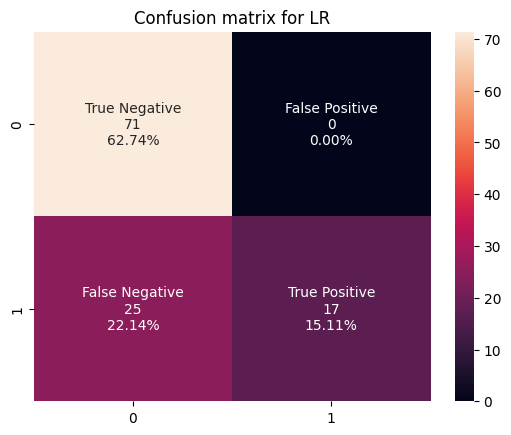

In [255]:
group_names = ["True Negative", "False Positive", "False Negative", "True Positive"]
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
label = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
confusion_label = np.asarray(label).reshape(2,2)
lr_fn = confusion_label[1,0].split('\n')[1]

plt.figure()
ax = plt.axes()
ax.set_title("Confusion matrix for LR")
sns.heatmap(cf_matrix, annot=confusion_label, fmt="")

Below we have a visual plot of the confusion matrix for the last fold model

[Text(0.5, 1.0, 'LR Scatterplot')]

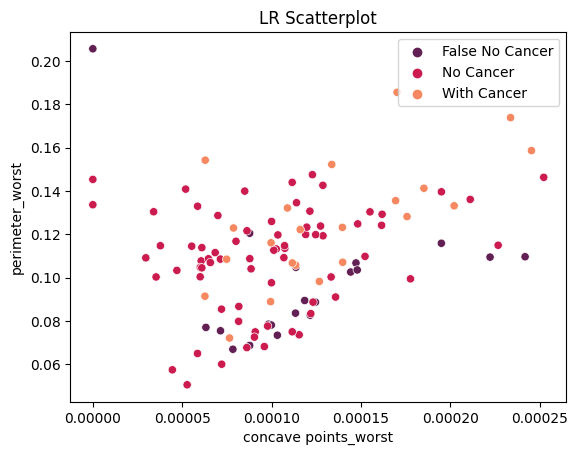

In [256]:
sns.scatterplot(x=x_test[axis_1], y=x_test[axis_2], hue=y_corrects, palette="rocket").set(title="LR Scatterplot")

##### **Naive Bayes**

In [257]:
from sklearn.naive_bayes import GaussianNB

nFolds = 5

kf = StratifiedKFold(n_splits=5, shuffle = True, random_state = 42)
model = GaussianNB()

In [258]:
# Separate into features (X) and target (Y)
X_file, Y_file = normalized_file.drop("diagnosis", axis=1), normalized_file["diagnosis"]

# Initialize metrics variables
y_nCounts = [0]
accuracy_list = []
f1_list = []
precision_list = []
cf_matrix = None
# Split the file into training and testing sets
for train_index, test_index in kf.split(X_file, Y_file):

    # Set the length of nCounts
    if len(y_nCounts) != len(test_index) and len(y_nCounts) != len(test_index)+1:
        y_nCounts = [0]*len(test_index)

    # Fit the model to the training data
    x_train, y_train = X_file.iloc[ train_index], Y_file.iloc[ train_index]
    trained_model = model.fit(x_train, y_train)

    # Predict using the trained model
    x_test, y_test = X_file.iloc[test_index], Y_file.iloc[test_index]
    y_prediction = trained_model.predict(x_test)

    # Metrics gathering
    y_nCounts = [count if y_pred == y_real
                 else count+1
                 for y_pred, y_real, count in zip(y_prediction, y_test, y_nCounts) ]


    y_corrects = ["With Cancer" if y_pred == y_real and y_pred == 1
                  else "No Cancer" if y_pred == y_real and y_pred == 0
    else "False No Cancer" if y_pred == 0
    else "False Cancer"
                  for y_pred, y_real in zip(y_prediction, y_test) ]
    y_corrects.sort()

    accuracy_list.append(accuracy_score(y_prediction, y_test))
    precision_list.append(precision_score(y_prediction, y_test))
    f1_list.append(f1_score(y_prediction, y_test))


    if(cf_matrix is None):
        cf_matrix = confusion_matrix(y_test, y_prediction)/nFolds
    else:
        cf_matrix += confusion_matrix(y_test, y_prediction)/nFolds

Analyizing the results we are able to find an average value of the model's accuracy, precision and F1 score.

In [259]:
nb_acc = sum(accuracy_list)/nFolds
nb_pre = sum(precision_list)/nFolds
nb_f1 = sum(f1_list)/nFolds

print("Average Accuracy: " + str(nb_acc))
print("Average Precision: " + str(nb_pre))
print("Average F1: " + str(nb_f1))


Average Accuracy: 0.8190498369818352
Average Precision: 0.9106312292358805
Average F1: 0.7922913282345332


Here we have the average confusion_matrix

<Axes: title={'center': 'Confusion matrix for NB'}>

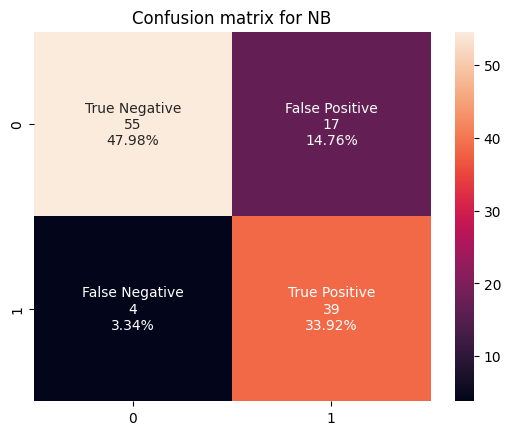

In [260]:
group_names = ["True Negative", "False Positive", "False Negative", "True Positive"]
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
label = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
confusion_label = np.asarray(label).reshape(2,2)
nb_fn = confusion_label[1,0].split('\n')[1]

plt.figure()
ax = plt.axes()
ax.set_title("Confusion matrix for NB")
sns.heatmap(cf_matrix, annot=confusion_label, fmt="")

Below we have a visual plot of the confusion matrix for the last fold model

[Text(0.5, 1.0, 'NB Scatterplot')]

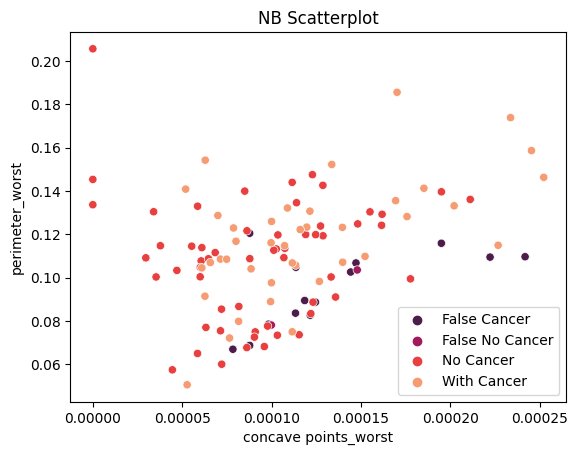

In [261]:
sns.scatterplot(x=x_test[axis_1], y=x_test[axis_2], hue=y_corrects, palette="rocket").set(title="NB Scatterplot")

##### **SGD**

In [262]:
from sklearn.linear_model import SGDClassifier

nFolds = 5

kf = StratifiedKFold(n_splits=5, shuffle = True, random_state = 42)
model = SGDClassifier(loss = "modified_huber", shuffle = True, random_state = 42)


In [263]:
# Separate into features (X) and target (Y)
X_file, Y_file = normalized_file.drop("diagnosis", axis=1), normalized_file["diagnosis"]

# Initialize metrics variables
y_nCounts = [0]
accuracy_list = []
f1_list = []
precision_list = []
cf_matrix = None
# Split the file into training and testing sets
for train_index, test_index in kf.split(X_file, Y_file):

    # Set the length of nCounts
    if len(y_nCounts) != len(test_index) and len(y_nCounts) != len(test_index)+1:
        y_nCounts = [0]*len(test_index)

    # Fit the model to the training data
    x_train, y_train = X_file.iloc[ train_index], Y_file.iloc[ train_index]
    trained_model = model.fit(x_train, y_train)

    # Predict using the trained model
    x_test, y_test = X_file.iloc[test_index], Y_file.iloc[test_index]
    y_prediction = trained_model.predict(x_test)

    # Metrics gathering
    y_nCounts = [count if y_pred == y_real
                 else count+1
                 for y_pred, y_real, count in zip(y_prediction, y_test, y_nCounts) ]


    y_corrects = ["With Cancer" if y_pred == y_real and y_pred == 1
                  else "No Cancer" if y_pred == y_real and y_pred == 0
    else "False No Cancer" if y_pred == 0
    else "False Cancer"
                  for y_pred, y_real in zip(y_prediction, y_test) ]
    y_corrects.sort()

    accuracy_list.append(accuracy_score(y_prediction, y_test))
    precision_list.append(precision_score(y_prediction, y_test))
    f1_list.append(f1_score(y_prediction, y_test))


    if(cf_matrix is None):
        cf_matrix = confusion_matrix(y_test, y_prediction)/nFolds
    else:
        cf_matrix += confusion_matrix(y_test, y_prediction)/nFolds

Analyizing the results we are able to find an average value of the model's accuracy, precision and F1 score.

In [264]:
sgd_acc = sum(accuracy_list)/nFolds
sgd_pre = sum(precision_list)/nFolds
sgd_f1 = sum(f1_list)/nFolds

print("Average Accuracy: " + str(sgd_acc))
print("Average Precision: " + str(sgd_pre))
print("Average F1: " + str(sgd_f1))


Average Accuracy: 0.9068778140040367
Average Precision: 0.8351052048726467
Average F1: 0.8715372834584306


Here we have the average confusion_matrix

<Axes: title={'center': 'Confusion matrix for SGD'}>

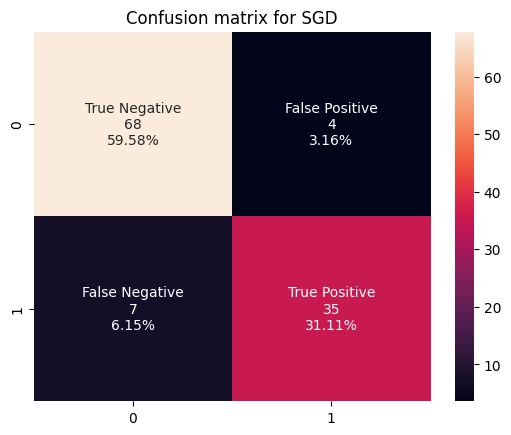

In [265]:
group_names = ["True Negative", "False Positive", "False Negative", "True Positive"]
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
label = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
confusion_label = np.asarray(label).reshape(2,2)
sgd_fn = confusion_label[1,0].split('\n')[1]

plt.figure()
ax = plt.axes()
ax.set_title("Confusion matrix for SGD")
sns.heatmap(cf_matrix, annot=confusion_label, fmt="")

Below we have a visual plot of the confusion matrix for the last fold model

[Text(0.5, 1.0, 'SGD Scatterplot')]

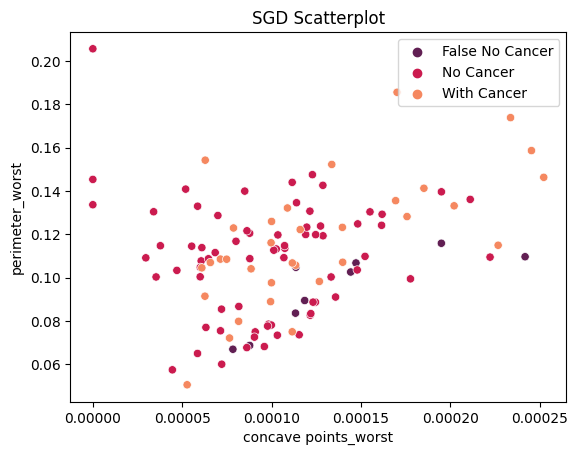

In [266]:
sns.scatterplot(x=x_test[axis_1], y=x_test[axis_2], hue=y_corrects, palette="rocket").set(title="SGD Scatterplot")

##### **KNeighbors**

In [267]:
from sklearn.neighbors import KNeighborsClassifier

nFolds = 5

kf = StratifiedKFold(n_splits=nFolds, shuffle = True, random_state = 42)
model = KNeighborsClassifier(n_neighbors = 50)


In [268]:
# Separate into features (X) and target (Y)
X_file, Y_file = normalized_file.drop("diagnosis", axis=1), normalized_file["diagnosis"]

# Initialize metrics variables
y_nCounts = [0]
accuracy_list = []
f1_list = []
precision_list = []
cf_matrix = None
# Split the file into training and testing sets
for train_index, test_index in kf.split(X_file, Y_file):

    # Set the length of nCounts
    if len(y_nCounts) != len(test_index) and len(y_nCounts) != len(test_index)+1:
        y_nCounts = [0]*len(test_index)

    # Fit the model to the training data
    x_train, y_train = X_file.iloc[ train_index], Y_file.iloc[ train_index]
    trained_model = model.fit(x_train, y_train)

    # Predict using the trained model
    x_test, y_test = X_file.iloc[test_index], Y_file.iloc[test_index]
    y_prediction = trained_model.predict(x_test)

    # Metrics gathering
    y_nCounts = [count if y_pred == y_real
                 else count+1
                 for y_pred, y_real, count in zip(y_prediction, y_test, y_nCounts) ]


    y_corrects = ["With Cancer" if y_pred == y_real and y_pred == 1
                  else "No Cancer" if y_pred == y_real and y_pred == 0
    else "False No Cancer" if y_pred == 0
    else "False Cancer"
                  for y_pred, y_real in zip(y_prediction, y_test) ]
    y_corrects.sort()

    accuracy_list.append(accuracy_score(y_prediction, y_test))
    precision_list.append(precision_score(y_prediction, y_test))
    f1_list.append(f1_score(y_prediction, y_test))


    if(cf_matrix is None):
        cf_matrix = confusion_matrix(y_test, y_prediction)/nFolds
    else:
        cf_matrix += confusion_matrix(y_test, y_prediction)/nFolds

Analyizing the results we are able to find an average value of the model's accuracy, precision and F1 score.

In [269]:
kn_acc = sum(accuracy_list)/nFolds
kn_pre = sum(precision_list)/nFolds
kn_f1 = sum(f1_list)/nFolds

print("Average Accuracy: " + str(kn_acc))
print("Average Precision: " + str(kn_pre))
print("Average F1: " + str(kn_f1))


Average Accuracy: 0.9068933395435492
Average Precision: 0.79734219269103
Average F1: 0.8647934857934858


Here we have the average confusion_matrix

<Axes: title={'center': 'Confusion matrix for KNeighbors'}>

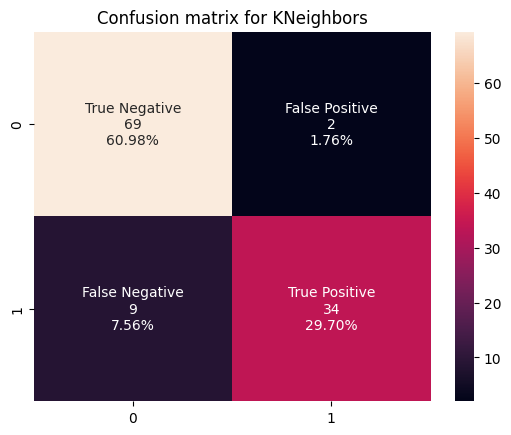

In [270]:
group_names = ["True Negative", "False Positive", "False Negative", "True Positive"]
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
label = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
confusion_label = np.asarray(label).reshape(2,2)
kn_fn = confusion_label[1,0].split('\n')[1]

plt.figure()
ax = plt.axes()
ax.set_title("Confusion matrix for KNeighbors")
sns.heatmap(cf_matrix, annot=confusion_label, fmt="")

Below we have a visual plot of the confusion matrix for the last fold model

[Text(0.5, 1.0, 'KNeighbors Scatterplot')]

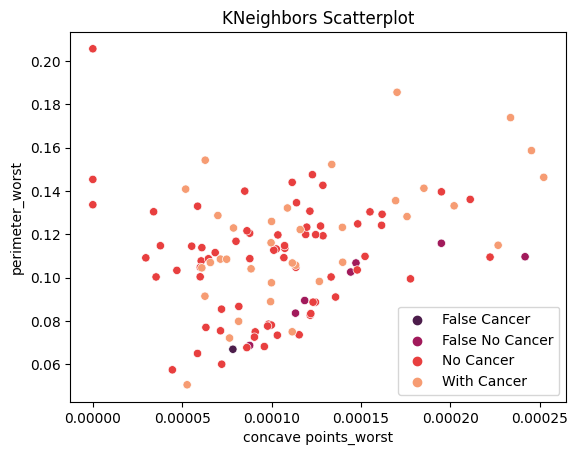

In [271]:
sns.scatterplot(x=x_test[axis_1], y=x_test[axis_2], hue=y_corrects, palette="rocket").set(title="KNeighbors Scatterplot")

##### **Decision Tree**

In [272]:
from sklearn.tree import DecisionTreeClassifier

nFolds = 5

kf = StratifiedKFold(n_splits=nFolds, shuffle = True, random_state = 42)
model = DecisionTreeClassifier(max_depth = 10, random_state = 42)

In [273]:
# Separate into features (X) and target (Y)
X_file, Y_file = normalized_file.drop("diagnosis", axis=1), normalized_file["diagnosis"]

# Initialize metrics variables
y_nCounts = [0]
accuracy_list = []
f1_list = []
precision_list = []
cf_matrix = None
# Split the file into training and testing sets
for train_index, test_index in kf.split(X_file, Y_file):

    # Set the length of nCounts
    if len(y_nCounts) != len(test_index) and len(y_nCounts) != len(test_index)+1:
        y_nCounts = [0]*len(test_index)

    # Fit the model to the training data
    x_train, y_train = X_file.iloc[ train_index], Y_file.iloc[ train_index]
    trained_model = model.fit(x_train, y_train)

    # Predict using the trained model
    x_test, y_test = X_file.iloc[test_index], Y_file.iloc[test_index]
    y_prediction = trained_model.predict(x_test)

    # Metrics gathering
    y_nCounts = [count if y_pred == y_real
                 else count+1
                 for y_pred, y_real, count in zip(y_prediction, y_test, y_nCounts) ]


    y_corrects = ["With Cancer" if y_pred == y_real and y_pred == 1
                  else "No Cancer" if y_pred == y_real and y_pred == 0
    else "False No Cancer" if y_pred == 0
    else "False Cancer"
                  for y_pred, y_real in zip(y_prediction, y_test) ]
    y_corrects.sort()

    accuracy_list.append(accuracy_score(y_prediction, y_test))
    precision_list.append(precision_score(y_prediction, y_test))
    f1_list.append(f1_score(y_prediction, y_test))


    if(cf_matrix is None):
        cf_matrix = confusion_matrix(y_test, y_prediction)/nFolds
    else:
        cf_matrix += confusion_matrix(y_test, y_prediction)/nFolds

Analyizing the results we are able to find an average value of the model's accuracy, precision and F1 score.

In [274]:
dt_acc = sum(accuracy_list)/nFolds
dt_pre = sum(precision_list)/nFolds
dt_f1 = sum(f1_list)/nFolds

print("Average Accuracy: " + str(dt_acc))
print("Average Precision: " + str(dt_pre))
print("Average F1: " + str(dt_f1))


Average Accuracy: 0.9332712311752832
Average Precision: 0.9056478405315616
Average F1: 0.9098472380261329


Here we have the average confusion_matrix

<Axes: title={'center': 'Confusion matrix for DT'}>

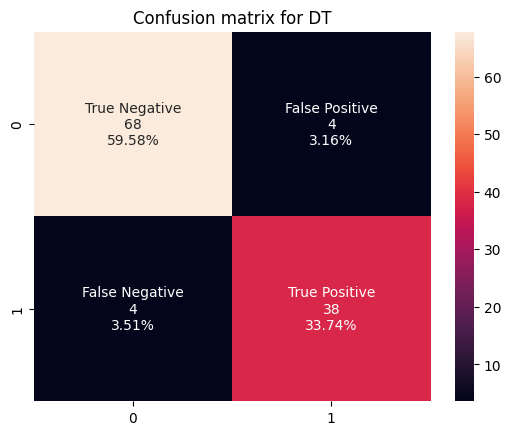

In [275]:
group_names = ["True Negative", "False Positive", "False Negative", "True Positive"]
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
label = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
confusion_label = np.asarray(label).reshape(2,2)
dt_fn = confusion_label[1,0].split('\n')[1]

plt.figure()
ax = plt.axes()
ax.set_title("Confusion matrix for DT")

sns.heatmap(cf_matrix, annot=confusion_label, fmt="")

Below we have a visual plot of the confusion matrix for the last fold model

[Text(0.5, 1.0, 'DT Scatterplot')]

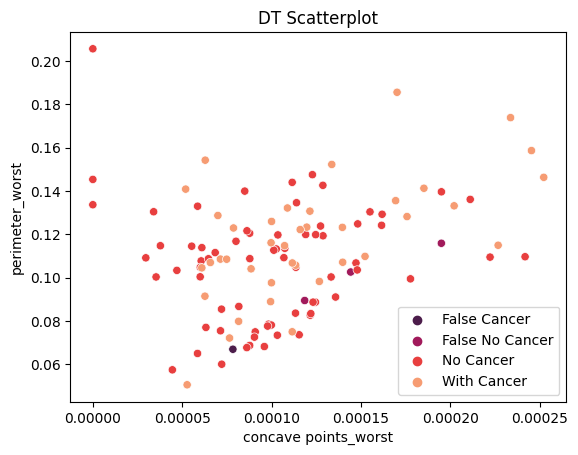

In [276]:
sns.scatterplot(x=x_test[axis_1], y=x_test[axis_2], hue=y_corrects, palette="rocket").set(title="DT Scatterplot")

##### **Random Forest**

In [277]:
from sklearn.ensemble import RandomForestClassifier

nFolds = 5

kf = StratifiedKFold(n_splits=nFolds, shuffle = True, random_state = 42)
model = RandomForestClassifier(n_estimators = 70,  random_state = 42)


In [278]:
# Separate into features (X) and target (Y)
X_file, Y_file = normalized_file.drop("diagnosis", axis=1), normalized_file["diagnosis"]

# Initialize metrics variables
y_nCounts = [0]
accuracy_list = []
f1_list = []
precision_list = []
cf_matrix = None
# Split the file into training and testing sets
for train_index, test_index in kf.split(X_file, Y_file):

    # Set the length of nCounts
    if len(y_nCounts) != len(test_index) and len(y_nCounts) != len(test_index)+1:
        y_nCounts = [0]*len(test_index)

    # Fit the model to the training data
    x_train, y_train = X_file.iloc[ train_index], Y_file.iloc[ train_index]
    trained_model = model.fit(x_train, y_train)

    # Predict using the trained model
    x_test, y_test = X_file.iloc[test_index], Y_file.iloc[test_index]
    y_prediction = trained_model.predict(x_test)

    # Metrics gathering
    y_nCounts = [count if y_pred == y_real
                 else count+1
                 for y_pred, y_real, count in zip(y_prediction, y_test, y_nCounts) ]


    y_corrects = ["With Cancer" if y_pred == y_real and y_pred == 1
                  else "No Cancer" if y_pred == y_real and y_pred == 0
    else "False No Cancer" if y_pred == 0
    else "False Cancer"
                  for y_pred, y_real in zip(y_prediction, y_test) ]
    y_corrects.sort()

    accuracy_list.append(accuracy_score(y_prediction, y_test))
    precision_list.append(precision_score(y_prediction, y_test))
    f1_list.append(f1_score(y_prediction, y_test))


    if(cf_matrix is None):
        cf_matrix = confusion_matrix(y_test, y_prediction)/nFolds
    else:
        cf_matrix += confusion_matrix(y_test, y_prediction)/nFolds

Analyizing the results we are able to find an average value of the model's accuracy, precision and F1 score.

In [279]:
rf_acc = sum(accuracy_list)/nFolds
rf_pre = sum(precision_list)/nFolds
rf_f1 = sum(f1_list)/nFolds

print("Average Accuracy: " + str(rf_acc))
print("Average Precision: " + str(rf_pre))
print("Average F1: " + str(rf_f1))


Average Accuracy: 0.9525694767893185
Average Precision: 0.9248062015503876
Average F1: 0.93473630831643


Here we have the average confusion_matrix

<Axes: title={'center': 'Confusion matrix for RF'}>

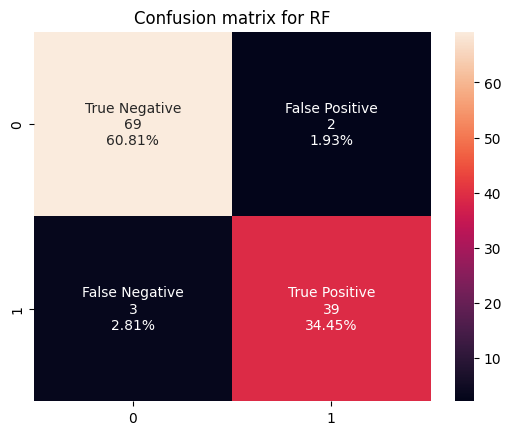

In [280]:
group_names = ["True Negative", "False Positive", "False Negative", "True Positive"]
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
label = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
confusion_label = np.asarray(label).reshape(2,2)
rf_fn = confusion_label[1,0].split('\n')[1]

plt.figure()
ax = plt.axes()
ax.set_title("Confusion matrix for RF")

sns.heatmap(cf_matrix, annot=confusion_label, fmt="")

Below we have a visual plot of the confusion matrix for the last fold model

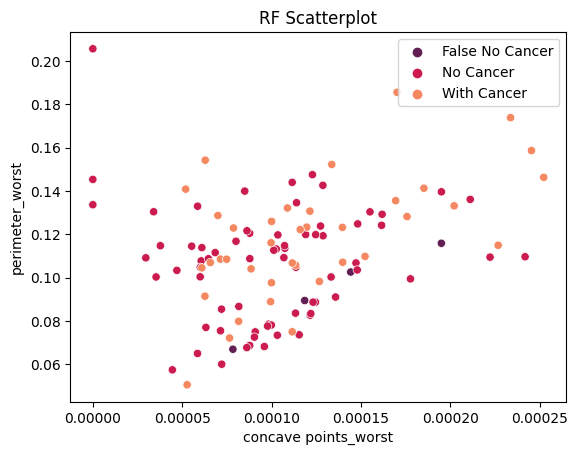

In [281]:
scp = sns.scatterplot(x=x_test[axis_1], y=x_test[axis_2], hue=y_corrects, palette="rocket", legend="full").set(title="RF Scatterplot")

##### **SVC**

In [282]:
from sklearn.svm import SVC

nFolds = 5

kf = StratifiedKFold(n_splits=nFolds, shuffle = True, random_state = 42)
model = SVC(kernel = "poly", random_state = 42)

In [283]:
# Separate into features (X) and target (Y)
X_file, Y_file = normalized_file.drop("diagnosis", axis=1), normalized_file["diagnosis"]

# Initialize metrics variables
y_nCounts = [0]
accuracy_list = []
f1_list = []
precision_list = []
cf_matrix = None
# Split the file into training and testing sets
for train_index, test_index in kf.split(X_file, Y_file):

    # Set the length of nCounts
    if len(y_nCounts) != len(test_index) and len(y_nCounts) != len(test_index)+1:
        y_nCounts = [0]*len(test_index)

    # Fit the model to the training data
    x_train, y_train = X_file.iloc[ train_index], Y_file.iloc[ train_index]
    trained_model = model.fit(x_train, y_train)

    # Predict using the trained model
    x_test, y_test = X_file.iloc[test_index], Y_file.iloc[test_index]
    y_prediction = trained_model.predict(x_test)

    # Metrics gathering
    y_nCounts = [count if y_pred == y_real
                 else count+1
                 for y_pred, y_real, count in zip(y_prediction, y_test, y_nCounts) ]


    y_corrects = ["With Cancer" if y_pred == y_real and y_pred == 1
                  else "No Cancer" if y_pred == y_real and y_pred == 0
    else "False No Cancer" if y_pred == 0
    else "False Cancer"
                  for y_pred, y_real in zip(y_prediction, y_test) ]
    y_corrects.sort()

    accuracy_list.append(accuracy_score(y_prediction, y_test))
    precision_list.append(precision_score(y_prediction, y_test))
    f1_list.append(f1_score(y_prediction, y_test))


    if(cf_matrix is None):
        cf_matrix = confusion_matrix(y_test, y_prediction)/nFolds
    else:
        cf_matrix += confusion_matrix(y_test, y_prediction)/nFolds

Analyizing the results we are able to find an average value of the model's accuracy, precision and F1 score.

In [284]:
svc_acc = sum(accuracy_list)/nFolds
svc_pre = sum(precision_list)/nFolds
svc_f1 = sum(f1_list)/nFolds

print("Average Accuracy: " + str(svc_acc))
print("Average Precision: " + str(svc_pre))
print("Average F1: " + str(svc_f1))


Average Accuracy: 0.9069088650830617
Average Precision: 0.7737541528239202
Average F1: 0.8608721397077561


Here we have the average confusion_matrix

<Axes: title={'center': 'Confusion matrix for SVC'}>

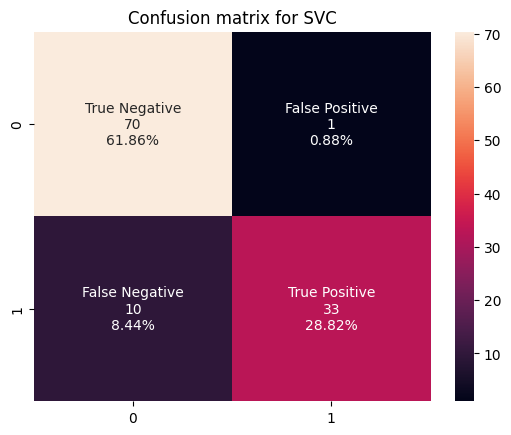

In [285]:
group_names = ["True Negative", "False Positive", "False Negative", "True Positive"]
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
label = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
confusion_label = np.asarray(label).reshape(2,2)
svc_fn = confusion_label[1,0].split('\n')[1]

plt.figure()
ax = plt.axes()
ax.set_title("Confusion matrix for SVC")

sns.heatmap(cf_matrix, annot=confusion_label, fmt="")

Below we have a visual plot of the confusion matrix for the last fold model

[Text(0.5, 1.0, 'SVC Scatterplot')]

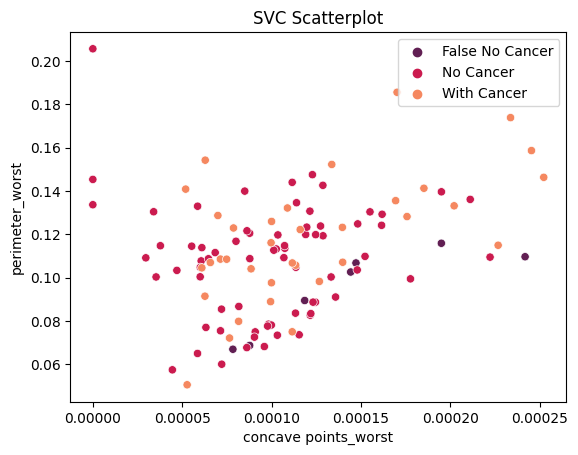

In [286]:
sns.scatterplot(x=x_test[axis_1], y=x_test[axis_2], hue=y_corrects, palette="rocket").set(title="SVC Scatterplot")

#### **4. Conclusions**

Here we have a comparion between all models

In [287]:
lr_dict = {'Accuracy': lr_acc,
            'Precision': lr_pre,
            'F1': lr_f1,
            'False Negatives': lr_fn}

nb_dict = {'Accuracy': nb_acc,
            'Precision': nb_pre,
            'F1': nb_f1,
            'False Negatives': nb_fn}

sgd_dict = {'Accuracy': sgd_acc,
            'Precision': sgd_pre,
            'F1': sgd_f1,
            'False Negatives': sgd_fn}

kn_dict = {'Accuracy': kn_acc,
            'Precision': kn_pre,
            'F1': kn_f1,
            'False Negatives': kn_fn}

dt_dict = {'Accuracy': dt_acc,
            'Precision': dt_pre,
            'F1': dt_f1,
            'False Negatives': dt_fn}

rf_dict = {'Accuracy': rf_acc,
            'Precision': rf_pre,
            'F1': rf_f1,
            'False Negatives': rf_fn}

svc_dict = {'Accuracy': svc_acc,
            'Precision': svc_pre,
            'F1': svc_f1,
            'False Negatives': svc_fn}

resume = pd.DataFrame({'Logistic Regression':pd.Series(lr_dict),
                       'Naive Bayes':pd.Series(nb_dict),
                       'SGD':pd.Series(sgd_dict),
                       'K-Neighbors':pd.Series(kn_dict),
                       'Decision Tree':pd.Series(dt_dict),
                       'Random Forest':pd.Series(rf_dict),
                       'SVC':pd.Series(svc_dict),
                      })
resume

Logistic Regression Naive Bayes       SGD K-Neighbors   
Accuracy                   0.778637     0.81905  0.906878    0.906893  \
Precision                  0.405426    0.910631  0.835105    0.797342   
F1                         0.572659    0.792291  0.871537    0.864793   
False Negatives                  25           4         7           9   

                Decision Tree Random Forest       SVC  
Accuracy             0.933271      0.952569  0.906909  
Precision            0.905648      0.924806  0.773754  
F1                   0.909847      0.934736  0.860872  
False Negatives             4             3        10

Taking into account the gathered results, more notably the confusion matrix results of each model and the values of the previous table, it seems the model that best fits our data is Random Forest, not only because of its domination in the accuracy, precision and F1 measurements but also its rate of false negatives and false positives.

For a further work, we could search about hyperparameter tuning for the diferent models.